### 1. Download and Explore Dataset

Before getting the data and starting exploring this, all the necessary dependencies are needed to be downloaded.

In [1]:
!conda config --set allow_conda_downgrades true
!conda install conda=4.6.11
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge geopy --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - conda=4.6.11


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.11               |           py37_0         1.5 MB
    pycosat-0.6.3              |   py37h27cfd23_0          81 KB
    ruamel_yaml-0.15.87        |   py37h7b6447c_1         245 KB
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following NEW packages will be INSTALLED:

  conda              pkgs/main/linux-64::conda-4.6.11-py37_0
  pycosat            pkgs/main/linux-64::pycosat-0.6.3-py37h27cfd23_0
  ruamel_yaml        pkgs/main/linux-64::ruamel_yaml-0.15.87-py37h7b6447c_1



conda-4.6.11         | 1.5 MB    | ###

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

import csv

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

import folium # plotting library
import json

from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library

from sklearn.cluster import KMeans

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML

print('Folium installed')
print('Libraries imported')

Folium installed
Libraries imported


Houston city has a total of 88 super neighborhoods. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains all the 88 neigborhoods as well as the the latitude and logitude coordinates of each neighborhood. 

This dataset exists for free on the Wikipedia page [List of Houston neighborhoods](https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods).

Luckily _pandas_ knows how to scrap and read tables from the webpage. Here's the dataframe of Houston's super neighborhoods.

In [3]:
df_housuperhoods = pd.read_html('https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods')[0]
df_housuperhoods

,#,Name,Location relative to Downtown Houston,Approximate boundaries
0,1,Willowbrook,Northwest,Along Texas State Highway 249 northwest of Bel...
1,2,Greater Greenspoint,North,Around the junction of Beltway 8 and Interstat...
2,3,Carverdale,Northwest,South of the junction of Beltway 8 and U.S. Ro...
3,4,Fairbanks / Northwest Crossing,Northwest,Along U.S. Route 290 between Interstate 610 an...
4,5,Greater Inwood,Northwest,North of Fairbanks / Northwest Crossing and ea...
...,...,...,...,...
83,84,Spring Branch North,Northwest,"East of Beltway 8, south of Clay Road, west of..."
84,85,Spring Branch Central,Northwest,Between Blalock Road and Bingle Road north of ...
85,86,Spring Branch East,Northwest,"Enclosed by Blalock Road, Highway 290, Interst..."
86,87,Greenway / Upper Kirby,Southwest,Along Interstate 69 between Bissonnet Road and...


Installing geocoder library in order to get the latitude and longitude values of Houston and it's neighborhoods.

In [4]:
pip install geocoder

     |████████████████████████████████| 98 kB 10.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import geocoder
print('Geocoder imported')

Geocoder imported


In [6]:
def get_latlng(name):

    # initialize your variable to None
    lat_lng_coords = None
    
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        
        g = geocoder.arcgis('{}, Houston, Texas'.format(name))
        lat_lng_coords = g.latlng
    
    return lat_lng_coords

In [7]:
latlong = [get_latlng(name) for name in df_housuperhoods['Name'].tolist()]
latlong

[[29.95240000000007, -95.54462999999998],
 [29.939670000000035, -95.40747999999996],
 [29.849590000000035, -95.54244999999997],
 [29.849380000000053, -95.51087999999999],
 [29.869770000000074, -95.48043999999999],
 [29.87047000000007, -95.43535999999995],
 [29.88847000000004, -95.41459999999995],
 [29.83937000000003, -95.55360999999999],
 [29.814340000000072, -95.61592999999999],
 [29.801100000000076, -95.54932999999994],
 [29.826440000000048, -95.48876999999999],
 [33.217340000000036, -96.62706999999995],
 [29.82797000000005, -95.39369999999997],
 [29.79684000000003, -95.43403999999998],
 [29.796250000000043, -95.39486999999997],
 [29.77263000000005, -95.57091999999994],
 [29.75795000000005, -95.63096999999999],
 [29.74768000000006, -95.57423999999997],
 [29.725484461288932, -95.55103598948064],
 [29.732170000000053, -95.52336999999994],
 [29.760150000000067, -95.47670999999997],
 [29.888899459838154, -95.32449993087188],
 [29.751900000000035, -95.43281999999994],
 [29.742810000000077

Adding longitude and latitude values to the excisting dataframe of Houston neighborhoods.

In [8]:
#create a temporary data frome
df_latlong =pd.DataFrame(latlong, columns=['Latitude', 'Longitude'])

#merge to the excisting dataframe
df_housuperhoods['Latitude']=df_latlong['Latitude']
df_housuperhoods['Longitude']=df_latlong['Longitude']


#check combined data frame for coordinates data
df_housuperhoods

,#,Name,Location relative to Downtown Houston,Approximate boundaries,Latitude,Longitude
0,1,Willowbrook,Northwest,Along Texas State Highway 249 northwest of Bel...,29.952400,-95.544630
1,2,Greater Greenspoint,North,Around the junction of Beltway 8 and Interstat...,29.939670,-95.407480
2,3,Carverdale,Northwest,South of the junction of Beltway 8 and U.S. Ro...,29.849590,-95.542450
3,4,Fairbanks / Northwest Crossing,Northwest,Along U.S. Route 290 between Interstate 610 an...,29.849380,-95.510880
4,5,Greater Inwood,Northwest,North of Fairbanks / Northwest Crossing and ea...,29.869770,-95.480440
...,...,...,...,...,...,...
83,84,Spring Branch North,Northwest,"East of Beltway 8, south of Clay Road, west of...",29.803513,-95.515875
84,85,Spring Branch Central,Northwest,Between Blalock Road and Bingle Road north of ...,29.815870,-95.517730
85,86,Spring Branch East,Northwest,"Enclosed by Blalock Road, Highway 290, Interst...",29.807620,-95.480110
86,87,Greenway / Upper Kirby,Southwest,Along Interstate 69 between Bissonnet Road and...,29.732500,-95.441440


In [9]:
#save as csv file
df_housuperhoods.to_csv("df_Houstonsuper.csv", index=False)

Getting the latitude and longitude values of Houston, TX. 

In order to define an instance of the geocoder, the user_agent is named as _coffee-lover-htx_.

In [10]:
#get location of Houston Texas

address ='Houston, Texas'
geolocator = Nominatim(user_agent='coffee-lover-htx')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('Geographical location of Houston, TX is {},{}.'.format(latitude, longitude))

Geographical location of Houston, TX is 29.7589382,-95.3676974.


#### Creating a map of Houston.

In [11]:
#Houston Map
houston_map = folium.Map(location=[latitude, longitude], zoom_start = 10)

for lat, lng, name in zip(df_housuperhoods['Latitude'], df_housuperhoods['Longitude'], df_housuperhoods['Name']):
    label = '{}'.format(name)
    popup = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius = 5,
    popup = popup,
    color = 'green',
    fill = True,
    fill_color = 'yellow',
    fill_opacity = 0.7,
    parse_html=False).add_to(houston_map)
    
houston_map

In [12]:
#save as HTML
houston_map.save ('houston_map.html')

### 2. Explore neighborhoods in Houston, TX

By utilizing the Foursquare API, the neighbourhoods are being explored and segmented

#### Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = 'JLH55UOQVZBU1BDVXC1DLCHSGAM3TDBHBPOCINNHU3QJWIR5'
CLIENT_SECRET = 'GOZGC4W2PQI0EGOKVEEMNDS3RMDK1Z5VLXMCLYG2GYNAJVHG'
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JLH55UOQVZBU1BDVXC1DLCHSGAM3TDBHBPOCINNHU3QJWIR5
CLIENT_SECRET:GOZGC4W2PQI0EGOKVEEMNDS3RMDK1Z5VLXMCLYG2GYNAJVHG


Getting all the venues in the Houston area.

In [102]:
radius = 3000
LIMIT = 200

venues_list = []

for lat,lng, name in zip(df_housuperhoods['Latitude'],df_housuperhoods['Longitude'],df_housuperhoods['Name']):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for v in results:
        venues_list.append((
                name,
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']))

In [103]:
#venue_list to new data frame
df_venues = pd.DataFrame(venues_list)

#column names
df_venues.columns = ['Name', 
                     'Name Latitude', 
                     'Name Longitude', 
                     'Venue Name',
                     'Venue Latitude',
                     'Venue Logitude',
                     'Venue Category']

df_venues

,Name,Name Latitude,Name Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
0,Willowbrook,29.9524,-95.54463,Bed Bath & Beyond,29.953517,-95.543865,Furniture / Home Store
1,Willowbrook,29.9524,-95.54463,Costco,29.954658,-95.547697,Warehouse Store
2,Willowbrook,29.9524,-95.54463,Babin's Seafood House,29.955088,-95.544452,Seafood Restaurant
3,Willowbrook,29.9524,-95.54463,Saltgrass Steak House,29.955011,-95.542082,Steakhouse
4,Willowbrook,29.9524,-95.54463,buybuy BABY,29.953127,-95.543557,Kids Store
...,...,...,...,...,...,...,...
6511,Lawndale / Wayside,29.7227,-95.30594,REY DEL POLLO- THE CHICKEN KING,29.716755,-95.291112,Mexican Restaurant
6512,Lawndale / Wayside,29.7227,-95.30594,Popeyes Louisiana Kitchen,29.736150,-95.304797,Fried Chicken Joint
6513,Lawndale / Wayside,29.7227,-95.30594,SUBWAY,29.701593,-95.297588,Sandwich Place
6514,Lawndale / Wayside,29.7227,-95.30594,Don Carlos Cantina,29.734219,-95.289089,Mexican Restaurant


In [104]:
df_venues.groupby(['Name']).count()

,Name Latitude,Name Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
Name,,,,,,
Acres Home,37,37,37,37,37,37
Addicks / Park Ten,14,14,14,14,14,14
Afton Oaks / River Oaks,100,100,100,100,100,100
Alief,100,100,100,100,100,100
Astrodome Area,100,100,100,100,100,100
...,...,...,...,...,...,...
Westbury,90,90,90,90,90,90
Westchase,100,100,100,100,100,100
Westwood,100,100,100,100,100,100


Creating the new dataset with the Venues attributed to _Coffee Shop_.

In [105]:
df_houcoffeeshop = df_venues.loc[df_venues['Venue Category'] == 'Coffee Shop']
df_houcoffeeshop 

,Name,Name Latitude,Name Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
13,Willowbrook,29.95240,-95.54463,Starbucks,29.959372,-95.547105,Coffee Shop
92,Greater Greenspoint,29.93967,-95.40748,Starbucks,29.947115,-95.407135,Coffee Shop
114,Greater Greenspoint,29.93967,-95.40748,Starbucks,29.922271,-95.413308,Coffee Shop
215,Fairbanks / Northwest Crossing,29.84938,-95.51088,Starbucks,29.849211,-95.502596,Coffee Shop
393,Acres Home,29.87047,-95.43536,Avid Coffee Co.,29.859287,-95.457434,Coffee Shop
...,...,...,...,...,...,...,...
6269,Spring Branch East,29.80762,-95.48011,Starbucks,29.785009,-95.495051,Coffee Shop
6277,Spring Branch East,29.80762,-95.48011,Starbucks,29.831588,-95.482848,Coffee Shop
6287,Spring Branch East,29.80762,-95.48011,Pura Coffee,29.782951,-95.476357,Coffee Shop
6339,Greenway / Upper Kirby,29.73250,-95.44144,Cavo Coffee,29.732732,-95.437160,Coffee Shop


In [106]:
print('{} coffee shops within Houston City Limits were returned by Foursquare.'.format(df_houcoffeeshop.shape[0]))
print('There are {} uniquely named coffee shops are found.'.format(len(df_houcoffeeshop['Venue Name'].unique())))

169 coffee shops within Houston City Limits were returned by Foursquare.
There are 36 uniquely named coffee shops are found.


In [107]:
df_houcoffeeshop['Venue Name'].unique()

array(['Starbucks', 'Avid Coffee Co.', 'filter(ed)', 'Throughgood Coffee',
       'Boomtown Coffee', 'Slowpokes', 'EQ Social House',
       'Antidote Coffee', 'Agora', 'Blacksmith', 'Campesino Coffee House',
       'Southside Espresso', 'Siphon Coffee', 'Fix Coffeebar',
       'Inversion Coffee House', 'Dandelion Cafe', 'Bellaire Coffee Shop',
       'Salento Bistrot', 'Fellini Caffè', 'Cavo Coffee',
       'Kaffeine Coffee & Internet Cafe', 'Rice Coffeehouse',
       "Peet's Coffee & Tea", 'Cafeza', "Uncle Bean's Coffee",
       'Catalina Coffee', 'Minuti Coffee', 'Retrospect Coffee Bar',
       'The Doshi House', 'The Library Coffee & Wine House',
       'Giant Leap Coffee', 'The Nook Cafe', 'Cougar Grounds',
       'Starbucks @ Hobby airport', 'Peets Coffee And Tea', 'Pura Coffee'],
      dtype=object)

In [108]:
df_houcoffeeshop['Venue Name'].value_counts()

Starbucks                          87
Kaffeine Coffee & Internet Cafe     6
The Nook Cafe                       4
Blacksmith                          4
The Library Coffee & Wine House     4
The Doshi House                     4
Fix Coffeebar                       4
Cougar Grounds                      4
Throughgood Coffee                  3
Siphon Coffee                       3
Salento Bistrot                     3
Retrospect Coffee Bar               3
Campesino Coffee House              3
Minuti Coffee                       3
Giant Leap Coffee                   2
Southside Espresso                  2
Cavo Coffee                         2
Slowpokes                           2
Dandelion Cafe                      2
Cafeza                              2
Bellaire Coffee Shop                2
Peet's Coffee & Tea                 2
Starbucks @ Hobby airport           2
Catalina Coffee                     2
Fellini Caffè                       2
Boomtown Coffee                     2
Pura Coffee 

### 3. Analyze Each Neighborhood in Houston, TX

In [109]:
houston_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix = "", prefix_sep = "")

#add Name column back to dataframe
houston_onehot['Name'] = df_venues['Name']

#move Name to first column
fixed_columns = [houston_onehot.columns[-1]] + list(houston_onehot.columns[:-1])
houston_onehot = houston_onehot[fixed_columns]

houston_onehot.head()

,Name,ATM,Accessories Store,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, rows are groupped by neighborhood and by taking the mean of the frequency of occurence of each category.

In [110]:
houston_grouped = houston_onehot.groupby('Name').mean().reset_index()
houston_grouped

,Name,ATM,Accessories Store,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Acres Home,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.0
1,Addicks / Park Ten,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.0
2,Afton Oaks / River Oaks,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.000000,0.010000,0.00,0.0,0.00,0.0
3,Alief,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.0
4,Astrodome Area,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.01,0.000000,0.000000,0.000000,0.00,0.0,0.01,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Westbury,0.0,0.011111,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.011111,0.011111,0.00,0.0,0.00,0.0
84,Westchase,0.0,0.010000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.010000,0.000000,0.01,0.0,0.00,0.0
85,Westwood,0.0,0.000000,0.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.0
86,Willow Meadows / Willowbend,0.0,0.010000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.010000,0.000000,0.00,0.0,0.00,0.0


In [119]:
htxcoffee = houston_grouped[['Name', 'Coffee Shop']]
htxcoffee

,Name,Coffee Shop
0,Acres Home,0.027027
1,Addicks / Park Ten,0.000000
2,Afton Oaks / River Oaks,0.000000
3,Alief,0.020000
4,Astrodome Area,0.020000
...,...,...
83,Westbury,0.011111
84,Westchase,0.030000
85,Westwood,0.000000
86,Willow Meadows / Willowbend,0.050000


### 4. Cluster Houston Coffee Lovers Neighborhoods

In [142]:
#set number of clusters
kclusters = 4

htxcoffee_clustering = htxcoffee.drop(['Name'],1)

#run k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(htxcoffee_clustering)

#check cluster labels
kmeans.labels_[0:10]

array([3, 1, 1, 3, 3, 1, 3, 1, 3, 1], dtype=int32)

In [143]:
#create new data frame that includes cluster
htxcoffee_merge = htxcoffee.copy()

#add clustering label
htxcoffee_merge['Cluster Labels'] = kmeans.labels_
htxcoffee

,Name,Coffee Shop
0,Acres Home,0.027027
1,Addicks / Park Ten,0.000000
2,Afton Oaks / River Oaks,0.000000
3,Alief,0.020000
4,Astrodome Area,0.020000
...,...,...
83,Westbury,0.011111
84,Westchase,0.030000
85,Westwood,0.000000
86,Willow Meadows / Willowbend,0.050000


Merging datasets together.

In [144]:
htxcoffee_merge = htxcoffee_merge.join(df_housuperhoods.set_index('Name'), on='Name')
htxcoffee_merge

,Name,Coffee Shop,Cluster Labels,#,Location relative to Downtown Houston,Approximate boundaries,Latitude,Longitude
0,Acres Home,0.027027,3,6,Northwest,West of Interstate 45 North and south of State...,29.870470,-95.435360
1,Addicks / Park Ten,0.000000,1,9,West,Includes the entirety of Addicks Reservoir and...,29.814340,-95.615930
2,Afton Oaks / River Oaks,0.000000,1,23,West,Straddles Buffalo Bayou east of Interstate 610,29.751900,-95.432820
3,Alief,0.020000,3,25,Southwest,West of Beltway 8 and south of Westpark Tollway,29.710880,-95.595690
4,Astrodome Area,0.020000,3,34,South,South of Brays Bayou between State Highway 288...,29.691500,-95.388690
...,...,...,...,...,...,...,...,...
83,Westbury,0.011111,1,37,Southwest,North of Highway 90 Alternate and east of Post...,29.655960,-95.482090
84,Westchase,0.030000,3,19,West,"East of West Houston Center Boulevard, south o...",29.725484,-95.551036
85,Westwood,0.000000,1,29,Southwest,"Triangular area between Beltway 8, Brays Bayou...",29.677800,-95.549420
86,Willow Meadows / Willowbend,0.050000,0,38,Southwest,"Enclosed by Highway 90 Alternate, Post Oak Roa...",29.668350,-95.445200


In [145]:
#sort by cluster label
htxcoffee_merge.sort_values(['Cluster Labels'], inplace = True)
htxcoffee_merge

,Name,Coffee Shop,Cluster Labels,#,Location relative to Downtown Houston,Approximate boundaries,Latitude,Longitude
59,Museum Park (formerly Binz),0.070000,0,66,South,Between Interstate 69 and State Highway 288 no...,29.72769,-95.38150
60,Neartown / Montrose,0.080000,0,24,Southwest,Straddles Montrose Boulevard east of Shepherd ...,29.74281,-95.39728
55,Meyerland,0.060000,0,31,Southwest,Along north bank of Brays Bayou immediately we...,29.68453,-95.46746
24,Fourth Ward,0.050000,0,60,West,"East of Taft Street, south of Buffalo Bayou, a...",29.75762,-95.38449
53,Medical Center,0.050000,0,33,South,South of Hermann Park between Main Street and ...,29.71179,-95.39315
...,...,...,...,...,...,...,...,...
47,Langwood,0.030000,3,11,Northwest,Between Hempstead Highway and U.S. Route 290 m...,29.82644,-95.48877
34,Greater Uptown,0.020000,3,21,West,West of Interstate 610 between Interstate 10 a...,29.76015,-95.47671
37,Gulfton,0.040000,3,27,Southwest,North of the city of Bellaire and south of Int...,29.71187,-95.48260
10,Central Northwest (formerly Near Northwest),0.030000,3,12,Northwest,East of U.S. Route 290 and north of Interstate...,33.21734,-96.62707


### 5. Visualize and Examine Clusters

In [146]:
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib import cm 

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = mp.cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [mp.colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(htxcoffee_merge['Latitude'], htxcoffee_merge['Longitude'], htxcoffee_merge['Name'], htxcoffee_merge['Cluster Labels']):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [147]:
#save map as HTML
map_clusters.save('map_clusters.html')

In [148]:
#examine clusters



#cluster 0
htxcoffee_merge.loc[htxcoffee_merge['Cluster Labels'] == 0]

,Name,Coffee Shop,Cluster Labels,#,Location relative to Downtown Houston,Approximate boundaries,Latitude,Longitude
59,Museum Park (formerly Binz),0.070000,0,66,South,Between Interstate 69 and State Highway 288 no...,29.727690,-95.381500
60,Neartown / Montrose,0.080000,0,24,Southwest,Straddles Montrose Boulevard east of Shepherd ...,29.742810,-95.397280
55,Meyerland,0.060000,0,31,Southwest,Along north bank of Brays Bayou immediately we...,29.684530,-95.467460
24,Fourth Ward,0.050000,0,60,West,"East of Taft Street, south of Buffalo Bayou, a...",29.757620,-95.384490
53,Medical Center,0.050000,0,33,South,South of Hermann Park between Main Street and ...,29.711790,-95.393150
50,MacGregor,0.060000,0,83,Southeast,"Along Brays Bayou south of Blodgett Street, ea...",29.711500,-95.356030
42,Independence Heights,0.050000,0,13,North,West of Interstate 45 north and north of Inter...,29.827970,-95.393700
30,Greater Hobby Area,0.046512,0,78,Southeast,"South of Sims Bayou, east of Mykawa Road, nort...",29.629490,-95.278480
29,Greater Heights,0.050000,0,15,Northwest,"East of White Oak Bayou, south of Interstate 6...",29.796250,-95.394870
75,Spring Branch East,0.050000,0,86,Northwest,"Enclosed by Blalock Road, Highway 290, Interst...",29.807620,-95.480110


In [149]:
#cluster 1
htxcoffee_merge.loc[htxcoffee_merge['Cluster Labels']==1]

,Name,Coffee Shop,Cluster Labels,#,Location relative to Downtown Houston,Approximate boundaries,Latitude,Longitude
48,Lawndale / Wayside,0.010000,1,88,Southeast,Northeast of Interstate 45 along Brays Bayou b...,29.722700,-95.305940
51,Magnolia Park,0.000000,1,82,East,"East of Union Pacific line, south and west of ...",29.732280,-95.292230
52,Meadowbrook / Allendale,0.000000,1,75,Southeast,"West of South Houston and Pasadena, south of S...",29.694460,-95.246600
46,Lake Houston,0.000000,1,44,Northeast,East of Interstate 69 and Beltway 8,30.020270,-95.110510
44,Kashmere Gardens,0.000000,1,52,Northeast,Inside Interstate 610 west of Elysian Street a...,29.803110,-95.312980
56,Mid-West (formerly Woodlake/Briarmeadow),0.010000,1,20,West,"East of Gessner Road, south of Buffalo Bayou, ...",29.732170,-95.523370
43,Jensen,0.000000,1,46,Northeast,North of Interstate 610 between Hardy Toll Roa...,29.799362,-95.342180
61,Northshore,0.000000,1,58,East,"North of Interstate 10, west of Interstate 610...",29.781810,-95.226240
85,Westwood,0.000000,1,29,Southwest,"Triangular area between Beltway 8, Brays Bayou...",29.677800,-95.549420
83,Westbury,0.011111,1,37,Southwest,North of Highway 90 Alternate and east of Post...,29.655960,-95.482090


In [150]:
#cluster 2
htxcoffee_merge.loc[htxcoffee_merge['Cluster Labels']==2]

,Name,Coffee Shop,Cluster Labels,#,Location relative to Downtown Houston,Approximate boundaries,Latitude,Longitude
41,IAH Airport,0.181818,2,42,North,North of Beltway 8 between Interstate 45 and I...,29.98789,-95.34948


In [154]:
#cluster 3
htxcoffee_merge.loc[htxcoffee_merge['Cluster Labels']==3]

,Name,Coffee Shop,Cluster Labels,#,Location relative to Downtown Houston,Approximate boundaries,Latitude,Longitude
6,Braeswood,0.030000,3,32,Southwest,Along north bank of Brays Bayou immediately ea...,29.705829,-95.394730
76,Spring Branch North,0.030000,3,84,Northwest,"East of Beltway 8, south of Clay Road, west of...",29.803513,-95.515875
80,University Place,0.040000,3,28,Southwest,"East of Kirby Drive, south of Interstate 69, w...",29.719490,-95.406430
4,Astrodome Area,0.020000,3,34,South,South of Brays Bayou between State Highway 288...,29.691500,-95.388690
8,Briar Forest,0.030000,3,18,West,"East of Dairy Ashford Road, south of Buffalo B...",29.747680,-95.574240
3,Alief,0.020000,3,25,Southwest,West of Beltway 8 and south of Westpark Tollway,29.710880,-95.595690
84,Westchase,0.030000,3,19,West,"East of West Houston Center Boulevard, south o...",29.725484,-95.551036
78,Sunnyside,0.023810,3,71,South,East of State Highway 288 and south of Interst...,29.662070,-95.365190
72,South Main,0.040000,3,35,South,Between Highway 90 Alternate (Main Street) and...,29.671020,-95.411950
64,Park Place,0.020000,3,74,Southeast,"Bound by Sims Bayou, Interstate 45, Interstate...",29.692130,-95.277590


In [153]:
htxcoffee_merge.describe()

,Coffee Shop,Cluster Labels,#,Latitude,Longitude
count,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.021872,1.409091,44.500000,29.796804,-95.403738
std,0.027934,1.078913,25.547342,0.380286,0.174777
min,0.000000,0.000000,1.000000,29.579670,-96.627070
25%,0.000000,1.000000,22.750000,29.695008,-95.483457
50%,0.011174,1.000000,44.500000,29.745450,-95.386625
75%,0.037929,3.000000,66.250000,29.814723,-95.304750
max,0.181818,3.000000,88.000000,33.217340,-95.110510


#### Plotting

In [168]:
import seaborn as sns

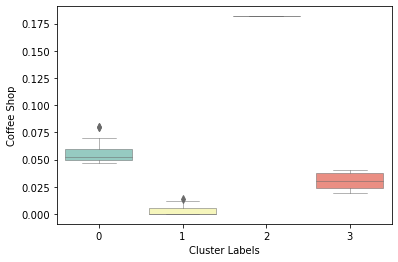

In [185]:
sns.boxplot(htxcoffee_merge['Cluster Labels'], htxcoffee_merge['Coffee Shop'], palette = "Set3", linewidth=0.5)

[Text(0, 0, 'South'),
 Text(0, 0, 'Southwest'),
 Text(0, 0, 'West'),
 Text(0, 0, 'Southeast'),
 Text(0, 0, 'North'),
 Text(0, 0, 'Northwest'),
 Text(0, 0, 'Northeast'),
 Text(0, 0, 'East'),
 Text(0, 0, '—')]

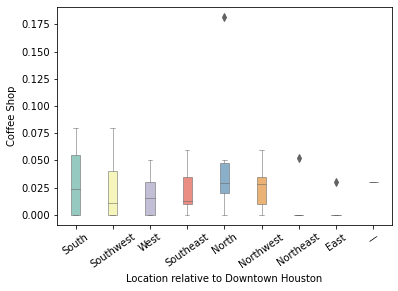

In [186]:
ax = sns.boxplot(htxcoffee_merge['Location relative to Downtown Houston'], htxcoffee_merge['Coffee Shop'], width = 0.25, palette = "Set3", linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)